In [1]:
import tensorflow as tf
import numpy as np

# Create 1000 phony x, y data points in NumPy, y = 1 + 5x + 4x^2
x_data = np.random.rand(1000).astype(np.float32)
y_data = 1 + 5 * x_data + 4 * x_data * x_data

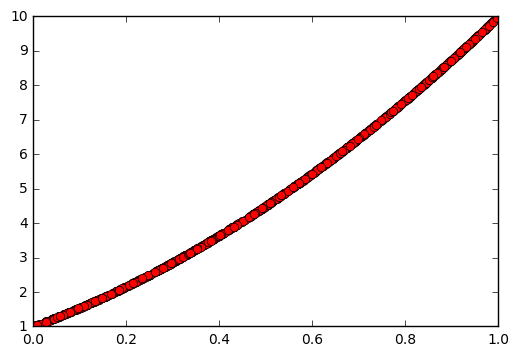

In [2]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'ro')
plt.show()

In [3]:
x_feed = np.array([x_data], np.float32)
x_feed = np.insert(x_feed, 0, 1, axis=0)
#x_feed = np.transpose(x_feed)
print(x_feed[:,[1]])
print(y_data[[1]])

[[ 1.      ]
 [ 0.905011]]
[ 8.80123425]


In [4]:
# Try to find values for W that compute y_data = (x_data, 1)^T * W * (x_data, 1)
# Correct W is [1,2; 3,4]
W = tf.Variable(tf.random_uniform([2, 2], -1.0, 1.0))
x = tf.placeholder(np.float32, shape=[2, 1], name="x")
y = tf.placeholder(np.float32, shape=[1], name="y")

output = tf.matmul(tf.matmul(x, W, transpose_a=True), x)

# Minimize the mean squared errors.
loss = tf.reduce_sum(tf.square(output - y))
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

# Before starting, initialize the variables.  We will 'run' this first.
init = tf.global_variables_initializer()


In [5]:
# Launch the graph.
sess = tf.Session()
sess.run(init)

# Fit the line.
for step in range(1000):
    sess.run(optimizer, feed_dict={ x: x_feed[:,[step%1000]], y: y_data[[step%1000]] })
    if step % 100 == 0:
        print(step, sess.run(W))
        #print(sess.run(loss, feed_dict={x: x_feed, y: y_data}))

0 [[ 8.25365448  5.87604046]
 [ 6.72672653  5.43104458]]
100 [[ 0.05505311  4.07889175]
 [ 4.9295783   0.13045552]]
200 [[-1.84037733  2.67596364]
 [ 3.52664733 -0.46062624]]
300 [[ 0.0844233   4.16632938]
 [ 5.01701355 -0.19144945]]
400 [[ 0.20812476  3.42997646]
 [ 4.28066015  1.23336279]]
500 [[ 1.48470461  3.36232495]
 [ 4.21300697  1.97671795]]
600 [[ 1.2903446   3.15180588]
 [ 4.00248814  2.69987392]]
700 [[ 0.67628527  2.957937  ]
 [ 3.80861688  2.37653971]]
800 [[-8.48167992 -4.78708267]
 [-3.93640137 -8.86123276]]
900 [[-1.88137317  3.16215897]
 [ 4.01283932  1.13470757]]


In [ ]:
x = np.array([1,0.27802682])
W = np.array([[ 3.36288142,   9.30607605],[ 10.19880104,  -2.37231898]])

print(x)
print(W)

print(np.matmul(np.matmul(np.transpose(x), W), x))

In [ ]:
y_prime = np.matmul(np.matmul(np.transpose(x_feed), W), x_feed)

print(y_prime)

plt.plot(x_data, y_prime, 'ro')
plt.show()